>#  HW6. 연령대별 성별비율을 산점도로 표현 - 2
학번: A70064, 이름: 안종민

목표: 사용자로부터 지역명을 입력받아 해당 지역의 0~100세 각 연령별 남성·여성 인구수를 컬러맵이 적용된 산점도로 표현하고, 남=여 기준선을 그린다.

데이터 출처: 행정안전부 주민등록인구통계 CSV (`population_by_gender.csv`)

시각화 도구: `Python`, `Matplotlib`

---
---

### 1. 환경 설정 & 드라이브 마운트

- 라이브러리 임포트, Colab 드라이브 마운트 등을 실행합니다.

In [1]:
from google.colab import drive
import csv
import os
import matplotlib.pyplot as plt

drive.mount('./gdrive', force_remount=True)
print(os.getcwd())

Mounted at ./gdrive
/content


### 2. 데이터 로드

- `population_by_gender.csv` 파일을 열고 헤더를 건너뛴 뒤, 리스트로 변환합니다.
- 인코딩 확인: CSV 파일이 `CP949(euc-kr)` 인코딩일 경우 `encoding='cp949'` 지정

In [2]:
f = open('./gdrive/MyDrive/Colab Notebooks/ch5_population/population_by_gender.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)  # 첫 줄은 헤더이므로 건너뛰기

### 3. 사용자 입력 및 데이터 추출

- 사용자 입력을 받고 해당 행을 찾아 target에 저장합니다.
- `for-else` 로 지역이 없을 때 예외 처리
- `target` 행에서 0~100세 남성 및 여성 인구수를 오름차순으로 리스트에 저장합니다.
- 쉼표 제거 `replace(',', '')` 후 `int()` 변환

In [3]:
# 입력 받기
region = input("인구 구조를 알고 싶은 지역명(예: 제주특별자치도)을 입력하세요: ").strip()

# 해당 지역 행 찾기
for row in data:
    if region in row[0]:
        target = row
        break
else:
    raise ValueError(f"'{region}' 데이터를 찾을 수 없습니다.")

#연령대별 남·여 인구수 추출 (0세→100세 순)
#  - 남성: 인덱스 3~103
male = [int(x.replace(',', '')) for x in target[3:104]]
#  - 여성: 슬라이스 -1:-102:-1 후 reverse()
female_slice = target[-1:-102:-1]
female_slice.reverse()
female = [int(x.replace(',', '')) for x in female_slice]

인구 구조를 알고 싶은 지역명(예: 제주특별자치도)을 입력하세요: 제주


### 4. 시각화 설정 및 Scatter 그래프 출력

- `ages`가 산점도의 컬러맵 값으로도 사용됩니다.
- `c=ages`와 `cmap='jet'`로 0세(파랑)→100세(빨강) 색상 표현
- `plt.plot`으로 대각선 기준선 추가
- 산점도 + 컬러맵 + 기준선이 그려진 그래프를 출력합니다.

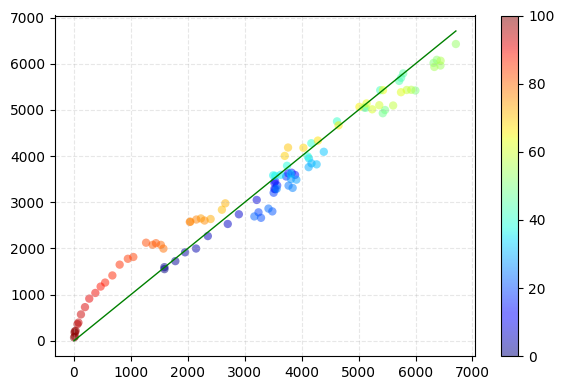

In [4]:
# 시각화 설정 및 그래프 출력

# 산점도 + 컬러맵 + 기준선
ages = list(range(101))
max_val = max(max(male), max(female))

plt.figure(figsize=(6, 4))
sc = plt.scatter(
    male,
    female,
    c=ages,           # 0~100세를 색상에 매핑
    cmap='jet',
    alpha=0.5,
    edgecolors='none'
)
# 대각선 기준선: 남=여
plt.plot([0, max_val], [0, max_val], 'g', linewidth=1)
plt.colorbar(sc)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()